#  Tutorial: SUSY Dataset - Introduction to Logistic Regression


## Source

https://github.com/drckf/mlreview_notebooks/tree/master/jupyter_notebooks/notebooks

as demonstrated in "A high-bias, low-variance introduction to Machine Learning for physicists" https://arxiv.org/pdf/1803.08823.pdf

## Learning Goals ##
This notebook will serve as an introduction to the logistic regression and will let us compare linear and non-linear models as well as different methods of regularization for the training of the model.

## Overview ##
Throughout, we will work with the [SUSY dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz). It is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html), which is a very comprehensive repository of useful datasets relevant to ML.

Here is the description of the SUSY dataset we will be playing around with for this notebook:
>The data has been produced using Monte Carlo simulations and contains events with two leptons (electrons or muons). In high energy physics experiments, such as the ATLAS and CMS detectors at the CERN LHC, one major hope is the discovery of new particles. To accomplish this task, physicists attempt to sift through data events and classify them as either a signal of some new physics process or particle, or instead a background event from understood Standard Model processes. Unfortunately we will never know for sure what underlying physical process happened (the only information to which we have access are the final state particles). However, we can attempt to define parts of phase space that will have a high percentage of signal events. Typically this is done by using a series of simple requirements on the kinematic quantities of the final state particles, for example having one or more leptons with large amounts of momentum that is transverse to the beam line ($p_{T}$). Here instead we will use logistic regression in order to attempt to find out the relative probability that an event is from a signal or a background event and rather than using the kinematic quantities of final state particles directly we will use the output of our logistic regression to define a part of phase space that is enriched in signal events. The dataset we are using has the value of 18 kinematic variables ("features") of the event. The first 8 features are direct measurements of final state particles, in this case the $p_{T}$, pseudo-rapidity ($\eta$), and azimuthal angle ($\phi$) of two leptons in the event and the amount of missing transverse momentum (MET) together with its azimuthal angle. The last ten features are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes. You can think of them as physicists attempt to use non-linear functions to classify signal and background events and they have been developed with a lot of deep thinking on the part of physicist. There is however, an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks and the dropout algorithm are presented in the original paper to compare the ability of deep-learning to bypass the need of using such high level features. We will also explore this topic in later notebooks. The dataset consists of 5 million events. For now 1,500,000 we will use for training the model and 50,000 examples will be used as a test set.

This dataset comes from this interesting paper by the UCI group: <cite> P. Baldi, P. Sadowski, and D. Whiteson. "Searching for Exotic Particles in High-energy Physics with Deep Learning." Nature Communications 5 (July 2, 2014)</cite>.

## Categorical data/Classification Tasks ##

So far, we have largely focused on supervised learning tasks such as linear regression, where the goal is to make predictions about continuous labels. Often, we are also interested in classification tasks -- where the goal is to assign samples to categories. The training data consists of a set of features and discrete labels. This type of data is called categorical data (the data comes in different categories). 

Initially, we will focus on a binary classification task. In the SUSY dataset, the goal is to decide whether a data point represents signal "potential collision"- labeled 1, or "background"(Standard Model processes which produce final states with similar constituents as SUSY processes) - labeled 0. This is done by looking at 18 features - the first 8 of which are "low-level" features that can be directly measured and the last 10 features are "higher-order" features constructed using physics intuition. In more detail:
>The first column is the class label (1 for signal, 0 for background), followed by the 18 features (8 low-level features then 10 high-level features):: lepton 1 pT, lepton 1 eta, lepton 1 phi, lepton 2 pT, lepton 2 eta, lepton 2 phi, missing energy magnitude, missing energy phi, MET_rel, axial MET, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, dPhi_r_b, cos(theta_r1)

Our goal will be to use either the first 8 features or the full 18 features to predict whether an event is signal or background.

## Logistic Regression ##


One of the best understood and canonical methods for performing such a task is Logistic Regression. We will see that a deep understanding of Logistic regression will introduce us to many of the ideas and techniques at the forefront of modern Machine Learning. In Logistic regression, each set of features $\mathbf{x}_i$ is associated with a category $C_i\in\{1,0\}$, with $i=1\ldots n$. It is helpful to re-define $\mathbf{x}$ to be an extended vector $\mathbf{x}\rightarrow (1,\mathbf{x})$ (which just accounts for an intercept, see Sec. VI of the review). Then, the Likelihood function for Logistic regression is given by the sigmoid function

$$
P(c_i=1)=1-P(c_i=0)= {1 \over 1+ e^{-\mathbf{w}\cdot \mathbf{x}_i}},
$$

where $\mathbf{w}$ are the weights that define the logistic regression. Notice that this is just the Fermi function with $\beta E=-\mathbf{w}\cdot \mathbf{x}$.


As in Sec. VI of the review, we will maximize the Log-likelihood of the observed data. Let us define the function
$$
f(a)={1 \over 1+ e^{-a}},
$$
Notice that the derivative with respect to $a$ is given by
$$
{df \over da}= f(1-f).
$$

Define $f_i \equiv f(\mathbf{w}\cdot \mathbf{x}_i)$. Then, the Likelihood of the data $\{ \mathbf{x}_i, C_i \}$ is given by
$$
P(Data|\mathbf{x})= \prod_{i=1}^n f_i^{C_i}(1-f_i)^{1-C_i}
$$
and the log-likelihood is given by
$$
\log{P(Data|\mathbf{w})}= \sum_{i=1}^n C_i \log f_i + (1-C_i)\log(1-f_i)
$$

The negative of the log-likelihood gives us the cross-entropy error function
$$
\mathrm{Cross\,Entropy}=E(\mathbf{w})= -\sum_{i=1}^n C_i \log f_i + (1-C_i)\log(1-f_i).
$$

Using the formula above notice that
$$
\nabla E(\mathbf{w})=\sum_{i=1}^n (f_i-C_i)\mathbf{x}_i.
$$
In other words, the gradient points in the sum of training example directions weighted by the difference between the true label and the probability of predicting that label.



## Finding the MLE Estimate ##

Notice the Maximum-Likelihood Estimation (MLE) is the same as minimizing the cross-entropy. There is no closed form expression for this. One strategy is to start with an arbitrary $\mathbf{w}$ and then update our estimate based on our error function. In particular, we would like to nudge $\mathbf{w}$ in the direction where the error is decreasing the fastest. This is the idea behind gradient descent. Furthermore, we can show that the cross-entropy error function used in logistic regression has a unique minimum. Thus, we can perform this procedure with relative ease (However, as a word of caution, note there is a generic instability in the MLE procedure for linearly separable data).

Theoretically, one nice method for doing this is the <i> Newton-Raphson </i> method. In this method, we iteratively calculate the gradient 
$$
\mathbf{w}^{new} \leftarrow \mathbf{w}^{old} - \mathbf{H}^{-1} \nabla E(\mathbf{w}),
$$
where $\mathbf{H}$ is the Hessian matrix which is the second derivative of the energy function. For OLS linear regression, one can show that this procedure yields the right answer.

More generally, there are a number of generalizations of this idea that have been proposed. We will refer to these kinds of methods as generalized gradient descent methods and discuss them extensively in what follows.

# Importing the SUSY data set with Pandas

In what follows, we use Pandas to import the first N_TRAIN examples as training data and the subsequent N_TEST examples as testing data.

In [1]:
N_TRAIN = 1500000
N_TEST = 50000

In [2]:
# Importing the SUSY Data set
import sys, os
import pandas as pd
import numpy as np
import warnings
import gzip, io, requests
import time

#Comment the next line on to turn off warnings
warnings.filterwarnings('ignore')

seed=12
np.random.seed(seed)

# To get the data set in a workable format, we can use two different methods.

# Method 1 (advised for Jupyter Notebook)

# Download the data SUSY.csv (about 2GB) one single time from UCI ML archive
# and save it in the same directory as this notebook or in the appropriate drive folder

# Origin data: https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

filename="SUSY.csv.gz"
columns=["signal", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", 
          "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]

# Load N_TRAIN rows as train data, N_TEST as test data
df_train = pd.read_csv(filename,names=columns,nrows=N_TRAIN,engine='python')
df_test = pd.read_csv(filename,names=columns,nrows=N_TEST, skiprows=N_TRAIN,engine='python')


# Method 2 (advised for Google Colab)

# download using url

#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz'
#columns=["signal", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
#         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", 
#         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]

#web_response = requests.get(url, timeout=30, stream=True)
#csv_gz_file = web_response.content # Content in bytes from requests.get
                                     # See comments below why this is used.

#f = io.BytesIO(csv_gz_file)
#with gzip.GzipFile(fileobj=f) as filename:
    # Passing a binary file to csv.reader works in PY2
    #reader = csv.reader(fh)

    # Load N_TRAIN rows as train data, N_TEST as test data
#    df_train=pd.read_csv(filename,names=columns,nrows=N_TRAIN,engine='python')
#    df_test=pd.read_csv(filename,names=columns,nrows=N_TEST, skiprows=N_TRAIN,engine='python')


print("Data parsing is done!")

Data parsing is done!


In [3]:
#show a snippet of the training data that we have just downloaded
df_train.head()

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


# Logistic Regression with scikit-learn packages

Let us define some functions to do the actual training for us and will let them take the number of features as an input parameter.

We'll be mainly using:

1. Multi-layer Perceptron classifier. (comes with L2 regularization)
2. Linear classifiers with SGD (stochastic gradient descent) training. (comes with L1 and L2 regularization)


See https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

in particular:

alpha (float), default=0.0001
Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
#import ml_style as style #optional styling sheet
#mpl.rcParams.update(style.style) #optional styling sheet

def getTrainData(nVar):
    designMatrix = df_train.iloc[:,1:nVar+1].values
    #now the signal
    labels = df_train['signal'].values # labels (0 or 1)
    return (designMatrix,labels)

def getTestData(nVar):
    designMatrix = df_test.iloc[:,1:nVar+1].values
    #now the signal
    labels = df_test['signal'].values
    return (designMatrix,labels)

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import roc_curve, roc_auc_score

def runSciKitNNRegression(nVar, alpha):
    X_train, y_train = getTrainData(nVar)
    X_test, y_test = getTestData(nVar)
    clf = MLPClassifier(alpha=alpha,max_iter=5).fit(X_train,y_train)
    predictions = clf.predict(X_test)
    print('MLP+L2: Accuracy on test data with alpha %.2E : %.3f' %(alpha,clf.score(X_test,y_test)) )
    probs = clf.predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
    print("AUC  = ", roc_auc_score(y_test, probs[:,1]))
    return (probs, fpr, tpr)

def runSciKitRegressionL1(nVar,alpha):
    X_train, y_train = getTrainData(nVar)
    X_test, y_test = getTestData(nVar)
    clf = SGDClassifier(loss="log", penalty="l1",alpha=alpha,max_iter=5,tol=None)
    clf.fit(X_train,y_train.ravel())
    predictions = clf.predict(X_test)
    print('SGD+L1: Accuracy on test data with alpha %.2E : %.3f' %(alpha,clf.score(X_test,y_test)) )
    probs = clf.predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
    print("AUC  = ", roc_auc_score(y_test, probs[:,1]))
    return (probs, fpr, tpr)

def runSciKitRegressionL2(nVar, alpha):
    X_train, y_train = getTrainData(nVar)
    X_test, y_test = getTestData(nVar)
    clf = SGDClassifier(loss="log", penalty="l2",alpha=alpha,max_iter=5,tol=None)
    clf.fit(X_train,y_train.ravel())
    predictions = clf.predict(X_test)
    print('SGD+L2: Accuracy on test data with alpha %.2E : %.3f' %(alpha,clf.score(X_test,y_test)) )
    probs = clf.predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
    print("AUC  = ", roc_auc_score(y_test, probs[:,1]))
    return (probs, fpr, tpr)

# Definitions

## 1. What is AUC - ROC Curve?

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is.

More information here: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

## 2. Regularisation

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

### 2a. What is L1 regularisation?

Lasso (L1) shrinks the less important feature’s coefficient to zero thus, **removing some features altogether**.
This in turn **reduces the model complexity**, making our model simpler. **A simpler model can reduce the chances of overfitting**.
L1 regularisation is defined as 
$$ ||w||_1 = (|w_1| + |w_2| + ...) $$

### 2b. What is L2 regularisation?

Overfitting is a phenomenon that occurs when a machine learning or statistics model is tailored to a particular dataset and is unable to generalise to other datasets. This usually happens in complex models, like deep neural networks.
Regularisation is a process of introducing additional information in order to **prevent overfitting**. 

A network with large network weights can be a sign of an unstable network where small changes in the input can lead to large changes in the output. This can be a sign that the network has overfit the training dataset and will likely perform poorly when making predictions on new data.

A solution to this problem is to update the learning algorithm to encourage the network to keep the weights small. This is called weight regularization and it can be used as a general technique to reduce overfitting of the training dataset and improve the generalization of the model.

L2 regularisation takes its name from `L2 norm of a vector w` defined as:
$$ ||w||_2 = (w_1^2 + w_2^2 + ...)^{1/2} $$

**L2 regularization shrinks the size of the parameters towards zero**.

More information here: https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261#f810

---

When we say a loss function is L1 or L2 regularized, that means that the above terms are added to the loss function in function of the parameters to be optimized:
$$ {\rm Loss}_{\rm regularized}(w) = {\rm Loss}(w) + \alpha*||w||_{1,2}$$

---

# Training with a Multi-layer Perceptron classifier (8 features)

We now will run logistic regression using a Multi-layer Perceptron classifier on the SUSY data for both the simple features (first 8 features) and the full feature space. First we will start with only the low-level features. We will also investigate the use of [Ridge Regression](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf) by testing the results as as function of the regularization parameter $\alpha$. 

Now let's run using the first 8 variables only (the low-level features). Note: this will take several minutes !

In [5]:
alpha = 10**-3

X_train, y_train = getTrainData(8)
X_test, y_test = getTestData(8)
clf = MLPClassifier(alpha=alpha,max_iter=5).fit(X_train,y_train)
predictions = clf.predict(X_test)
print('MLP+L2: Accuracy on test data with alpha %.2E : %.3f' %(alpha,clf.score(X_test,y_test)) )
probs = clf.predict_proba(X_test)
    
fpr, tpr, thresholds2 = roc_curve(y_test, probs[:,1])
print("AUC  = ", roc_auc_score(y_test, probs[:,1]))

MLP+L2: Accuracy on test data with alpha 1.00E-03 : 0.796
AUC  =  0.8687824851151292


In [6]:
# Let's make the ROC curve by hand one time to check everything is as expected

TT = np.linspace(0.,1., num=100)
TP = []
TN = []
FP = []
FN = []

for tt in TT:
    positive_preds = np.array([int(pp>tt) for pp in probs[:,1]])

    test_classification = np.transpose([positive_preds,y_test]).tolist()
    TP.append(test_classification.count([1.,1.]))
    TN.append(test_classification.count([0.,0.]))
    FP.append(test_classification.count([1.,0.]))
    FN.append(test_classification.count([0.,1.]))

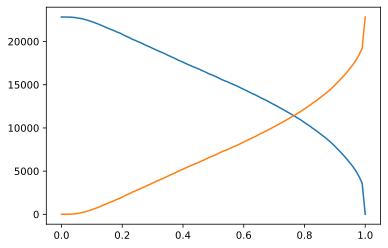

In [7]:
plt.plot(TT,TP)
plt.plot(TT,FN)

In [8]:
TPR = np.array(TP)/(np.array(TP)+np.array(FN))
FPR = np.array(FP)/(np.array(FP)+np.array(TN))

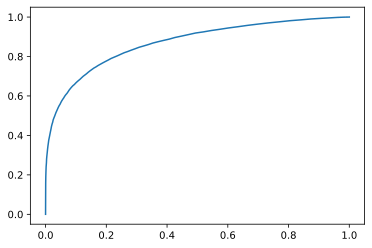

In [9]:
plt.plot(FPR,TPR)

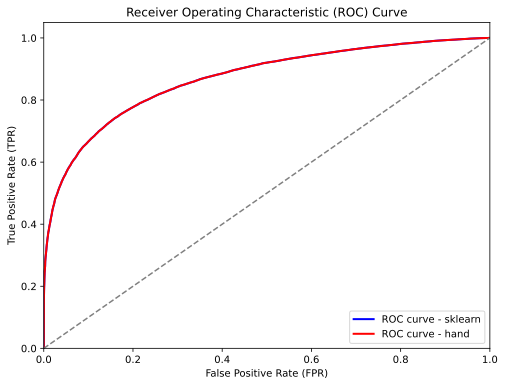

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve - sklearn')
plt.plot(FPR, TPR, color='red', lw=2, label='ROC curve - hand')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

MLP+L2: Accuracy on test data with alpha 1.00E-04 : 0.796
AUC  =  0.8687335987327807
MLP+L2: Accuracy on test data with alpha 1.00E-03 : 0.796
AUC  =  0.8672991064827094
MLP+L2: Accuracy on test data with alpha 1.00E-02 : 0.794
AUC  =  0.8676910971128389
MLP+L2: Accuracy on test data with alpha 1.00E-01 : 0.790
AUC  =  0.8620937772202448
MLP+L2: Accuracy on test data with alpha 1.00E+00 : 0.779
AUC  =  0.851059008028592
MLP+L2: Accuracy on test data with alpha 1.00E+01 : 0.760
AUC  =  0.8252609221587394
MLP+L2: Accuracy on test data with alpha 1.00E+02 : 0.543
AUC  =  0.5
MLP+L2: Accuracy on test data with alpha 1.00E+03 : 0.543
AUC  =  0.585961579994787
MLP+L2: Accuracy on test data with alpha 1.00E+04 : 0.543
AUC  =  0.5875500464545573


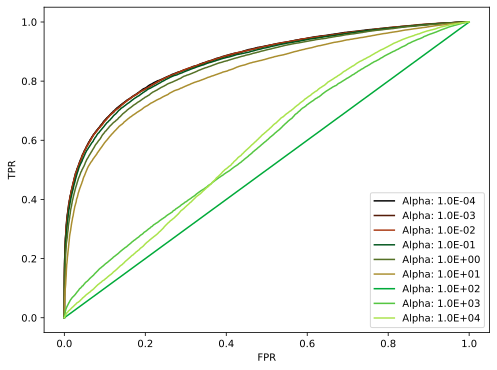

In [11]:
import time

start = time.time()

#generate alphas from 10^-4 to 10^4
alphas = np.logspace(-4,4,9)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
it=0

for alpha in alphas:
    #use different color scheme for each alpha
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    
    probs, FPR, TPR = runSciKitNNRegression(8,alpha)
    ax.plot(FPR, TPR, c=[c1,c2,c3], label='Alpha: %.1E' %alpha)    
    it+=1


ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.legend(loc='best', fontsize = 'medium');

---

An accuracy of ~79% is pretty good! More important to a physics analysis is the ROC curve above. This allows physicists to define a part of phase space that has more or less signal acceptance, but also less or more background rejection. It is up to the individual analysts in particular searches to decide on the best working point for them.

## Question 1: What does this plot tell you? How would the curve look as you approach a perfect classifier?

---

As you can see, using just the kinematic variables of the final state objects there is no need for regularization and in fact as we turn on the relative weights of the variables (as alpha goes to 1) we lose discrimination power.

## Question 2: Why do you think this is the case?

---

MLP+L2: Accuracy on test data with alpha 1.00E-04 : 0.796
AUC  =  0.8685664090462546


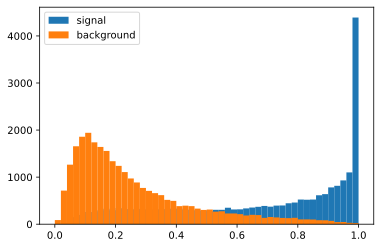

In [12]:
probs,fpr,tpr = runSciKitNNRegression(8,10**(-4))

X_test, y_test = getTestData(8)
signal = probs[:,1][y_test==1]
background = probs[:,1][y_test==0]

mybins = np.histogram_bin_edges(signal, bins=50, range=(0,1))
plt.hist(signal, bins=mybins, label='signal')
plt.hist(background, bins=mybins, label='background')
plt.legend(loc='best', fontsize = 'medium')

In [13]:
# same but with PANDAS
#probsSimple,fpr,tpr = runSciKitNNRegression(8,10**(-4))
#Signal = df_test['signal'].values

#df_test_acc = pd.DataFrame({'PROB':probsSimple[:,1]})
#df_test_acc['SIG']=Signal
#df_test_acc_sig = df_test_acc.query('SIG==1')
#df_test_acc_bkg = df_test_acc.query('SIG==0')
#df_test_acc_sig.plot(kind='hist',y='PROB',color='blue',alpha=0.5,bins=np.linspace(0,1,50),label='Signal')
#df_test_acc_bkg.plot(kind='hist',y='PROB',color='red',alpha=0.5,bins=np.linspace(0,1,50),label='Background')

---
## Question 3: What does this plot tell you about the classification model?
---

# Training with a Multi-layer Perceptron classifier (all 18 features)

MLP+L2: Accuracy on test data with alpha 1.00E-04 : 0.802
AUC  =  0.8752714365839469
MLP+L2: Accuracy on test data with alpha 1.00E-03 : 0.800
AUC  =  0.8745167961810534
MLP+L2: Accuracy on test data with alpha 1.00E-02 : 0.800
AUC  =  0.8747839043839882
MLP+L2: Accuracy on test data with alpha 1.00E-01 : 0.798
AUC  =  0.8732701273336302
MLP+L2: Accuracy on test data with alpha 1.00E+00 : 0.795
AUC  =  0.867560893027943
MLP+L2: Accuracy on test data with alpha 1.00E+01 : 0.769
AUC  =  0.8317600929514493
MLP+L2: Accuracy on test data with alpha 1.00E+02 : 0.543
AUC  =  0.7612050312044935
MLP+L2: Accuracy on test data with alpha 1.00E+03 : 0.543
AUC  =  0.6849897883901738
MLP+L2: Accuracy on test data with alpha 1.00E+04 : 0.543
AUC  =  0.38181337006413163


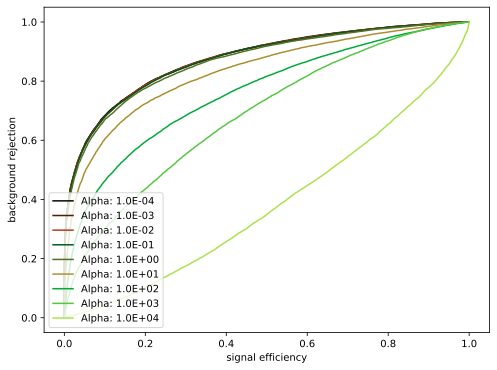

In [14]:
alphas = np.logspace(-4,4,9)
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,fpr,tpr = runSciKitNNRegression(18,alpha)
    ax.plot(fpr,tpr,c=[c1,c2,c3],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'medium');
plt.show()

---
Interestingly the accuracy barely improved! 

## Question 4: What can you conclude from this? Compute the difference in execution time between using 8 and 18 features and comment on whether you think it is worth it to use these 10 extra features in this problem.
---


MLP+L2: Accuracy on test data with alpha 1.00E-04 : 0.797
AUC  =  0.8690004248120871
finished in  21.718611001968384


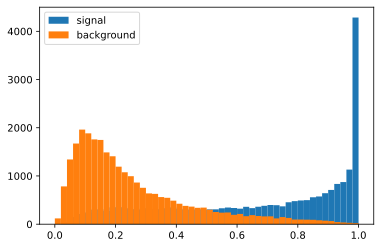

In [15]:
import time
start_time = time.time()
probs,fpr,tpr = runSciKitNNRegression(8,10**(-4))
print("finished in ",time.time()-start_time)

X_test, y_test = getTestData(8)
signal = probs[:,1][y_test==1]
background = probs[:,1][y_test==0]

mybins = np.histogram_bin_edges(signal, bins=50, range=(0,1))
plt.hist(signal, bins=mybins, label='signal')
plt.hist(background, bins=mybins, label='background')
plt.legend(loc='best', fontsize = 'medium')

MLP+L2: Accuracy on test data with alpha 1.00E-04 : 0.800
AUC  =  0.8737152329762656
finished in  23.632591009140015


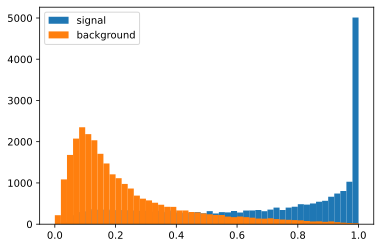

In [16]:
import time
start_time = time.time()
probs,fpr,tpr = runSciKitNNRegression(18,10**(-4))
print("finished in ",time.time()-start_time)

X_test, y_test = getTestData(8)
signal = probs[:,1][y_test==1]
background = probs[:,1][y_test==0]

mybins = np.histogram_bin_edges(signal, bins=50, range=(0,1))
plt.hist(signal, bins=mybins, label='signal')
plt.hist(background, bins=mybins, label='background')
plt.legend(loc='best', fontsize = 'medium')

## Question 5: Repeat the same exercice above but now with an SGDClassifier+L2 (directly with all 18 features). Does the Linear Classifer performs as good as Multi-layer Perceptron? Why is that?

Note: Please do that in new cells, that would help you compare the plots.

SGD+L2: Accuracy on test data with alpha 1.00E-04 : 0.789
AUC  =  0.8565172812757051
SGD+L2: Accuracy on test data with alpha 1.00E-03 : 0.788
AUC  =  0.8555867924090927
SGD+L2: Accuracy on test data with alpha 1.00E-02 : 0.781
AUC  =  0.8476668341261171
SGD+L2: Accuracy on test data with alpha 1.00E-01 : 0.753
AUC  =  0.8201780490602641
SGD+L2: Accuracy on test data with alpha 1.00E+00 : 0.714
AUC  =  0.7964943427546305
SGD+L2: Accuracy on test data with alpha 1.00E+01 : 0.457
AUC  =  0.8288831187101475
SGD+L2: Accuracy on test data with alpha 1.00E+02 : 0.543
AUC  =  0.7824049291453842
SGD+L2: Accuracy on test data with alpha 1.00E+03 : 0.543
AUC  =  0.7901617409764639
SGD+L2: Accuracy on test data with alpha 1.00E+04 : 0.457
AUC  =  0.8187022490745737


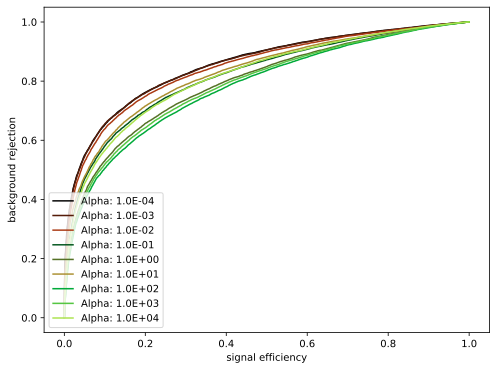

In [17]:
alphas = np.logspace(-4,4,9)
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,fpr,tpr = runSciKitRegressionL2(18,alpha)
    ax.plot(fpr,tpr,c=[c1,c2,c3],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'medium');
plt.show()


## Question 6: Repeat the same exercice above but now with an SGDClassifier+L1 (directly with all 18 features). How Does SGD+L1 compares to SGD+L2?

Note: Please do that in new cells, that would help you compare the plots.

SGD+L1: Accuracy on test data with alpha 1.00E-04 : 0.788
AUC  =  0.8569730705371186
SGD+L1: Accuracy on test data with alpha 1.00E-03 : 0.789
AUC  =  0.8564028470955758
SGD+L1: Accuracy on test data with alpha 1.00E-02 : 0.776
AUC  =  0.8433359252864021
SGD+L1: Accuracy on test data with alpha 1.00E-01 : 0.718
AUC  =  0.7805196742708921
SGD+L1: Accuracy on test data with alpha 1.00E+00 : 0.543
AUC  =  0.5
SGD+L1: Accuracy on test data with alpha 1.00E+01 : 0.457
AUC  =  0.5
SGD+L1: Accuracy on test data with alpha 1.00E+02 : 0.457
AUC  =  0.5
SGD+L1: Accuracy on test data with alpha 1.00E+03 : 0.543
AUC  =  0.5
SGD+L1: Accuracy on test data with alpha 1.00E+04 : 0.543
AUC  =  0.5


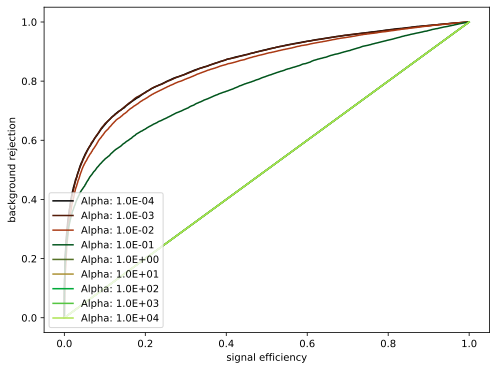

In [18]:
alphas = np.logspace(-4,4,9)
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,fpr,tpr = runSciKitRegressionL1(18,alpha)
    ax.plot(fpr,tpr,c=[c1,c2,c3],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'medium');
plt.show()

## Question 7: What conclusions can you draw on the usage of L1 and L2 for this specific dataset?

## a) What do these two regularisation methods tell us about the dataset?
## b) What do these two regularisation methods tell us about the features of the dataset?
## c) Which of these two regularisation methods is more suitable for the classification of this dataset?